# Data Exploration of the Steam Dataset

Please download the datasets at the following link and follow the instructions in `data/README.md`. Keep note of the pathnames used to load in the datasets and ensure they match what is in `data/` directory.

https://www.gigasheet.com/sample-data/steam-game-reviews

https://www.kaggle.com/datasets/mohamedtarek01234/steam-games-reviews-and-rankings

# A. Data Card

This section will explain what is contained in each point of our dataset.

### Datasets

*Steam Game Reviews:* https://www.gigasheet.com/sample-data/steam-game-reviews ~464MB

This dataset consists of ~990K rows of reviews taken from SteamDB, a database for the video game vendor, Steam.

*Steam Game Reviews and Rankings:* https://www.kaggle.com/datasets/mohamedtarek01234/steam-games-reviews-and-rankings ~1MB
 
This dataset is where we source game metadata to enrich our review information. This will help give better insights into the relationship between the kind of game and the reviews.

**Shape**

*Steam Game Reviews:* (992153, 8)

*Steam Game Reviews and Rankings:* (290, 13)

*Merged Working Dataset:* (992153, 24)

**Time**

This dataset covers review information from 2010-2024, with far more data coming from more recent time. (View visuals for review count by month/year)

### Column Dictionary

**For the working merged dataset**

**Provided Columns**    
`review` - The user's review string for the game   
`hours_played` - the amount of hours of the game the user played when they posted the review   
`helpful` - the amount of 'helpful' votes the user received from other users for their review   
`funny` - the amount of 'funny' votes the user received from other users for their review   
`recommendation` - whether the user recommends the game or not (0 - no, 1 - yes)   
`date` - the date when the user posted the review   
`game_name` - name of the game the user reviewed   
`username` - the user's personal alias   
`short_description` - the shortened description of the game from SteamDB   
`long_description` - the full description of the game from SteamDB   
`genres` - The list of genres that the game belongs to (ie. Action, Adventure, Horror...)   
`minimum_system_requirements` - the minimum hardware specs needed to run the game   
`recommended_system_requirements` - the hardware specs recommended by the developer to run the game smoothly   
`release_date` - the date when the game was released   
`developer` - the studio who developed the game   
`publisher` - the parent company that licensed the development of the game   
`overall_player_rating` - the overall average rating all reviews gave to the game (categorical)   
`number_of_reviews_from_purchased_people` - total number of reviews from players who purchased the game   
`number_of_english_reviews` - total number of reviews in english from players who purchased the game   
`link` - the link to the Steam page of the game   

**Created Columns by Us**     
`popular` - boolean value whether or not the review has >50 helpful votes   
`cat_playtime` - categorized bucketing for playtime hours     
`rec_ratio` - the ratio for recommended reviews to total reviews for the game based on the dataset reviews     
`in_sale` - a boolean that tells whether the review was posted during major sale periods (Summer - July, Winter - January)     

### Missingness Snapshot

*Steam Reviews*   
503 total missing reviews    
81 usernames    

*Steam Game Metadata*    
13 short descriptions (can be manually filled in)   

*Merged Working Dataset*    
Dates                                      1775    
short_description                          66892       
long_description                           66892    
genres                                     66892     
minimum_system_requirement                 66892   
recommend_system_requirement               66892    
release_date                               76879    
developer                                  66892    
publisher                                  66892    
overall_player_rating                      66892   
number_of_reviews_from_purchased_people    66892    
number_of_english_reviews                  66892   
link                                       66892   

The missing information from the merged dataset stems from the 11 games not covered by the metadata dataset. Can be filled manually.

### Quirks

1. Recent reviews do not include the year (because on Steam if a review is recent then it is just denoted by month and day). This was remedied by simply applying the year 2024 to all reviews missing a year. (data was collected in September of 2024)
2. A few usernames are poorly formatted and need to be fixed
3. 11 Games are missing metadata and can be filled manually
4. If a publisher owns their own development studio, then the publisher and developer will be the same.
5. A few of the review fields contain the year and need to be removed.
6. Genres, system requirements, and long_description are all list objects.

# 1 - Setup

### 1.1 Imports

Handles imports needed to run all cells in the notebook. If you haven't yet please run `pip install -r requirements.txt` 
in the main directory console to get necessary dependencies.

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

### 1.2 Load Datasets

This will load in all datasets that accompany this project. If you have not already, please follow the instructions in `data/README.md` to download the datasets required.

In [106]:
reviews_path = '../data/Steam Game Reviews export 2025-09-03 01-50-49.csv' # Replace with the path to your reviews CSV File
game_metadata_path = '../data/games_description.csv' # Replace with path to game metadata CSV file, NOTE make sure to go to parent dir in the path


steamreviews = pd.read_csv(reviews_path)
gamemetadata = pd.read_csv(game_metadata_path)
steamreviews.head()


,review,hours_played,helpful,funny,recommendation,date,game_name,username
0,The game itself is also super fun. The PvP and...,39.9,1152,13,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,13 September,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Fattest_falcon
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,12 September,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account


In [107]:
gamemetadata.head()

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...


### 1.3 Merge Datasets

We can combine the review dataset and game metadata dataset to enrich each review.


In [108]:
steamdataset = pd.merge(steamreviews, gamemetadata, left_on='game_name', right_on='name', how='left') ## This is like a join in SQL, so we join based on the game name
steamdataset.drop(columns=['name'], inplace=True) # don't need 2 names :)
steamdataset

,review,hours_played,helpful,funny,recommendation,date,game_name,username,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,The game itself is also super fun. The PvP and...,39.9,1152,13,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,13 September,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Fattest_falcon,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,12 September,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992148,2022 Early Access Review Loads of fun!Initiall...,4.2,1,0,Recommended,"August 4, 2022",Turbo Golf Racing,"Fatal Exit\n1,902 products in account",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992149,2022 Early Access Review Great fun!,8.5,1,0,Recommended,"August 4, 2022",Turbo Golf Racing,cleybaR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992150,2022 Early Access Review Excellent pick up and...,83.3,2,0,Recommended,"August 4, 2022",Turbo Golf Racing,Sim\n600 products in account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992151,2022 Early Access Review This game is so much ...,3.8,1,0,Recommended,"August 4, 2022",Turbo Golf Racing,Fatboybadboy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data Exploration

### Clean up data

Why are these missing values?? There are 14 games with missing values, we can fill them in later.

In [109]:
steamdataset[steamdataset['short_description'].isna()]['game_name'].unique()

array(['Raft', 'Stray', 'Dead Cells', "Don't Starve Together",
       'Ori and the Will of the Wisps', 'Life is Strange - Episode 1',
       'Human Fall Flat', "It Takes Two Friend's Pass", "Don't Starve",
       'It Takes Two', 'NieR:Automata™', 'PAYDAY 3', 'GUNDAM BREAKER 4',
       'Caves of Qud', 'Turbo Golf Racing'], dtype=object)

In [110]:
steamdataset[steamdataset['release_date'].isna()]['game_name'].unique()

array(['Raft', 'Stray', 'Dead Cells', "Don't Starve Together",
       'Ori and the Will of the Wisps', 'Life is Strange - Episode 1',
       'Human Fall Flat', "It Takes Two Friend's Pass", "Don't Starve",
       'It Takes Two', 'NieR:Automata™', 'PAYDAY 3', 'GUNDAM BREAKER 4',
       'Caves of Qud', 'Turbo Golf Racing'], dtype=object)

In [111]:
steamdataset[steamdataset['link'].isna()]['game_name'].unique()

array(['Raft', 'Stray', 'Dead Cells', "Don't Starve Together",
       'Ori and the Will of the Wisps', 'Life is Strange - Episode 1',
       'Human Fall Flat', "It Takes Two Friend's Pass", "Don't Starve",
       'It Takes Two', 'NieR:Automata™', 'PAYDAY 3', 'GUNDAM BREAKER 4',
       'Caves of Qud', 'Turbo Golf Racing'], dtype=object)

In [112]:
# TODO FILL IN MISSING METADATA, CAN BE DONE MANUALLY AT https://steamdb.info/ SEARCH FOR EACH GAME AND FILL IN

raft_data = steamdataset[steamdataset['game_name'] == 'Raft']
print(raft_data.head())
missing_games = [
    'Raft', 'Stray', 'Dead Cells', "Don't Starve Together",
    'Ori and the Will of the Wisps', 'Life is Strange - Episode 1',
    'Human Fall Flat', "It Takes Two Friend's Pass", "Don't Starve",
    'It Takes Two', 'NieR:Automata™', 'PAYDAY 3', 'GUNDAM BREAKER 4',
    'Caves of Qud', 'Turbo Golf Racing'
]

#steamdataset[steamdataset['game_name'].isin(missing_games)].isna().sum()

                                                   review  hours_played  \
321751  2019 Early Access Review Its a very fun game t...          77.5   
321752  2022 Product received for free I left my ex wi...          17.6   
321753                        2023 I can eat the seagulls          41.7   
321754  2020 Early Access Review Got the game because ...          37.0   
321755  2018 Early Access Review Just "finished" the g...          34.4   

        helpful  funny recommendation               date game_name  \
321751      831    854    Recommended   3 December, 2019      Raft   
321752      661    558    Recommended     6 August, 2022      Raft   
321753      213    116    Recommended  25 December, 2023      Raft   
321754      529    138    Recommended  28 November, 2020      Raft   
321755      844     27    Recommended       27 May, 2018      Raft   

             username short_description long_description genres  \
321751   DerpyPigKing               NaN              NaN    N

In [113]:
game = 'Raft'
missing_cols = steamdataset[steamdataset['game_name'] == game].isna().sum()
missing_cols = missing_cols[missing_cols > 0]
print(missing_cols)

review                                        1
short_description                          4990
long_description                           4990
genres                                     4990
minimum_system_requirement                 4990
recommend_system_requirement               4990
release_date                               4990
developer                                  4990
publisher                                  4990
overall_player_rating                      4990
number_of_reviews_from_purchased_people    4990
number_of_english_reviews                  4990
link                                       4990
dtype: int64


Let's look at the data and what we can work with for now.

In [114]:
def fixUsernames(name):
    if pd.isna(name) or name.strip() == "":
        return "Anonymous"
    return name.strip()

steamdataset['username'] = steamdataset['username'].apply(fixUsernames)

In [115]:
steamdataset.release_date = pd.to_datetime(steamdataset['release_date'], errors='coerce')

In [116]:
steamdataset.release_date

0        2024-09-09
1        2024-09-09
2        2024-09-09
3        2024-09-09
4        2024-09-09
            ...    
992148          NaT
992149          NaT
992150          NaT
992151          NaT
992152          NaT
Name: release_date, Length: 992153, dtype: datetime64[ns]

In [117]:
steamdataset.groupby(steamdataset['release_date'].dt.year).game_name.nunique()

release_date
2006.0     2
2007.0     1
2009.0     2
2010.0     2
2011.0     3
2012.0     2
2013.0     9
2014.0     5
2015.0    12
2016.0    12
2017.0    13
2018.0    22
2019.0    14
2020.0    14
2021.0    19
2022.0    20
2023.0    32
2024.0    41
Name: game_name, dtype: int64

## B. Transformations

### Missing Data Fixing

In [118]:
# A few dates are missing the year, highly likely that the missing year is 2024. When collecting data, Steam shows recent reviews WITHOUT the year.
def fixDates(date): 
    try:
        parts = date.split(' ')
        if len(parts) == 3:  
            # Already in format like "September 12, 2020"
            return date
        elif len(parts) == 2:
            # Format "12 September" → reorder → "September 12, 2024"
            if parts[0].isnumeric():
                day, month = parts
            else:
                month, day = parts
            fixed = f"{month} {day}, 2024"
            return fixed
        else:
            return pd.NA
    except Exception:
        return pd.NA

#### Series.map + date fixing

In [119]:
# Removing empty reviews, no text in the review column means no review information to analyize
steamdataset = steamdataset.dropna(subset=['review']).copy() # Need to use copy to avoid SettingWithCopyWarning
steamdataset['date'] = steamdataset['date'].map(fixDates)
steamdataset['date'] = pd.to_datetime(steamdataset['date'], errors='coerce')
steamdataset

,review,hours_played,helpful,funny,recommendation,date,game_name,username,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,The game itself is also super fun. The PvP and...,39.9,1152,13,Recommended,2024-09-14,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,2024-09-13,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,2024-09-14,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,2024-09-14,"Warhammer 40,000: Space Marine 2",Fattest_falcon,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,2024-09-12,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992148,2022 Early Access Review Loads of fun!Initiall...,4.2,1,0,Recommended,2022-08-04,Turbo Golf Racing,"Fatal Exit\n1,902 products in account",NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
992149,2022 Early Access Review Great fun!,8.5,1,0,Recommended,2022-08-04,Turbo Golf Racing,cleybaR,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
992150,2022 Early Access Review Excellent pick up and...,83.3,2,0,Recommended,2022-08-04,Turbo Golf Racing,Sim\n600 products in account,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
992151,2022 Early Access Review This game is so much ...,3.8,1,0,Recommended,2022-08-04,Turbo Golf Racing,Fatboybadboy,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


### Vectorized Boolean Mask

In [120]:
# We can possibly use the hours played or funny or helpful votes to create categorial columns, like oh this has more than some number of hours played, this is a player who played a lot of this game, or this is a funny review, etc.

steamdataset['popular'] = steamdataset['helpful'] > 50
print("Popular Value Counts")
print(steamdataset['popular'].value_counts())


# Categorized bucketing with playtime
def playtimeBucket(playtime):
    if playtime > 10000:
        return '10k+ hours'
    elif playtime > 1000:
        return '1k+ hours'
    elif playtime > 200:
        return '200+ hours'
    elif playtime > 50:
        return '50+ hours'
    elif playtime > 10:
        return '10+ hours'
    else:
        return '<10 hours'
    
steamdataset['cat_playtime'] = steamdataset['hours_played'].map(playtimeBucket)
print()
print("Hours played sorted by most in each bucket")
print(steamdataset.groupby('cat_playtime').review.count().nlargest(6))


Popular Value Counts
popular
False    928676
True      62974
Name: count, dtype: int64

Hours played sorted by most in each bucket
cat_playtime
10+ hours     310352
50+ hours     281299
200+ hours    180858
<10 hours     145455
1k+ hours      71352
10k+ hours      2334
Name: review, dtype: int64


In [121]:
# We want to adjust recommended to binary so that it is easier to work with
# 1 will be recommended, 0 is not recommended
steamdataset['recommendation'] = steamdataset['recommendation'].map({"Recommended": 1, "Not Recommended": 0})
steamdataset['recommendation'].value_counts()

recommendation
1    805315
0    186335
Name: count, dtype: int64

Because we updated the values of recommendation from "Recommended/Not Recommended" to 0/1, we can use the mean of each game's recommended attribute to get a recommended ratio `rec_ratio` for each individual game

In [122]:
rec_ratios = steamdataset.groupby('game_name')['recommendation'].mean()

Here we have the recommendation ratios based off of the collected reviews in the dataset to work with. We apply them to the dataset now.

In [123]:
# Now we can apply rec_ratio to every game with the map function.
# Rec ratios are already in key value pair {game_name: rec_ratio} so it is easily applicable.
steamdataset.dropna(subset=['genres'], inplace=True)
steamdataset['rec_ratio'] = steamdataset['game_name'].map(rec_ratios)
steamdataset['genres'] = steamdataset['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
steamdataset['genres'] = steamdataset['genres'].apply(lambda lst: lst[:5])
steamdataset.iloc[0]['genres']

['Warhammer 40K', 'Action', 'Third-Person Shooter', 'Adventure', 'Multiplayer']

In [124]:
# TODO We can categorically bucket based on playtime (like <100hrs vs100hrs vs 1000hrs vs 100000 hrs played for example, make up your own splits for whatever you think)

In [125]:
# TODO can use map or apply to fix usernames with some function fixUsernames. 

## C. Grouping And Sorting

In [126]:
# TODO A few group by options. By release or review year, game name, recommended, any new categorical columns made, overall rating... 
# Check word counts on popular reviews

### Question: What are traits about popular reviews differ from regular (<=50 helpful) reviews? What are traits of popular/helpful reviews?

In [127]:
# A few group by options. By release or review year, game name, recommended, any new categorical columns made, overall rating... 
# Check word counts on popular reviews
print(steamdataset.groupby('popular').review.apply(lambda x: x.str.split(" ").str.len().mean()))
print("Average word count between popular and not popular reviews show that popular reviews are longer on average. By over double. To be expected since more helpful reviews are likely more detailed.")
print(steamdataset.groupby('popular').recommendation.value_counts(normalize=True))
print("This is the calculation of recommendation ratios for 'popular' reviews (>50 helpful votes). \nPopular reviews also have a higher ratio of being more critical than non-popular reviews (18% vs 23%). Not a significant margin, but users find critical reviews more helpful.")

#this chart can see how many recommended reviews came out during certain years
steamdataset.groupby(['release_date', 'recommendation']).size().unstack()

popular
False     63.627889
True     142.484970
Name: review, dtype: float64
Average word count between popular and not popular reviews show that popular reviews are longer on average. By over double. To be expected since more helpful reviews are likely more detailed.
popular  recommendation
False    1                 0.808516
         0                 0.191484
True     1                 0.765641
         0                 0.234359
Name: proportion, dtype: float64
This is the calculation of recommendation ratios for 'popular' reviews (>50 helpful votes). 
Popular reviews also have a higher ratio of being more critical than non-popular reviews (18% vs 23%). Not a significant margin, but users find critical reviews more helpful.


recommendation,0,1
release_date,,
2006-02-16,167,4841
2006-11-29,224,4785
2007-10-10,1477,3533
2009-05-05,30,4980
2009-11-16,189,4821
...,...,...
2024-09-15,39,1801
2024-09-17,84,157
2024-09-18,41,641


### Question: Does playtime correlate with recommendations? If a player plays longer, do they like the game more?

In [128]:
print(steamdataset.groupby('recommendation').hours_played.mean())
print("What do recommendations mean for hours played? \nAnswer: Recommended reviews seem to play slightly more hours (10%) on average than non=recommended reviews. However, the difference is not as significant as expected.")

recommendation
0    326.079467
1    363.184056
Name: hours_played, dtype: float64
What do recommendations mean for hours played? 
Answer: Recommended reviews seem to play slightly more hours (10%) on average than non=recommended reviews. However, the difference is not as significant as expected.


### Question: Which publishers and developers have the most recommendations? This could be an indicator of popularity so we can also find recommendation ratios as well!

In [129]:
publisherrecs = pd.DataFrame(steamdataset[steamdataset['recommendation'] == 1].groupby('publisher')['recommendation'].count().sort_values(ascending=False).head(10))
developerrecs = pd.DataFrame(steamdataset[steamdataset['recommendation'] == 1].groupby('developer')['recommendation'].count().sort_values(ascending=False).head(10))
print(publisherrecs, "\n", developerrecs, "\n")
print("Top 10 publishers and developers by number of recommendations. \nThese are mostly large publishers and developers, so this is expected.")

                             recommendation
publisher                                  
['Electronic Arts']                   32534
['Xbox Game Studios']                 29009
['SEGA']                              26400
['Valve']                             20415
['Paradox Interactive']               16470
['Ubisoft']                           14450
['Coffee Stain Publishing']           14323
['Square Enix']                       14086
['CAPCOM Co., Ltd.']                  12805
['Bethesda Softworks']                 9922 
                                                     recommendation
developer                                                         
['Valve']                                                    15630
['CAPCOM Co., Ltd.']                                         12805
['FromSoftware, Inc.']                                       12703
['SCS Software']                                              9785
['Square Enix']                                               9195
[

Let's Look at developer and publisher ratios! This should give more indication of what users like, whereas above gives indication of who users would purchase from.

In [130]:
publisherrecsratio = pd.DataFrame(steamdataset.groupby('publisher').recommendation.mean().sort_values(ascending=False).head(10))
developerrecsratio = pd.DataFrame(steamdataset.groupby('developer').recommendation.mean().sort_values(ascending=False).head(10))
print(publisherrecsratio, "\n", developerrecsratio, "\n")
print("Top 10 publishers and developers by recommendation ratio. \nThese are a mix of large and smaller publishers and developers, indicating that users may prefer games from these companies more. \nSomething to note, these organizations share publisher and developer roles. Indicating that these are independent studios (with no large publisher backing). \nThese games may fit a niche that they do very well!")

                                           recommendation
publisher                                                
['BeamNG']                                       0.998397
['Landfall']                                     0.995382
['Duoyi Games']                                  0.994209
['PopCap Games, Inc.', 'Electronic Arts']        0.994012
['poncle']                                       0.991218
['Studio Minus']                                 0.990214
['Supergiant Games']                             0.989000
['Amistech Games']                               0.987976
['Unknown Worlds Entertainment']                 0.987349
['Mega Crit']                                    0.986824 
                                   recommendation
developer                                       
['BeamNG']                              0.998397
['Landfall']                            0.995382
['Duoyi Games']                         0.994209
['PopCap Games, Inc.']                  0.994012
['poncle

Now let's look at the opposite. What do players not enjoy as much in terms of ratios. What polarizes them?

In [131]:
publisherbadrecsratio = pd.DataFrame(steamdataset.groupby('publisher').recommendation.mean().sort_values(ascending=True).head(10))
developerbadrecsratio = pd.DataFrame(steamdataset.groupby('developer').recommendation.mean().sort_values(ascending=True).head(10))
print(publisherbadrecsratio, "\n", developerbadrecsratio, "\n")
print("Top 10 publishers and developers by LOWEST recommendation ratio.")

                                        recommendation
publisher                                             
['Gaijin Network Ltd']                        0.345578
['SEGA', 'Feral Interactive']                 0.422284
['Activision']                                0.434541
['KONAMI']                                    0.458987
['NEXON']                                     0.460248
['Studio Wildcard', 'Snail Games USA']        0.464221
['Wizards of the Coast LLC']                  0.476714
['Bungie']                                    0.507987
['Blizzard Entertainment, Inc.']              0.516980
['Wargaming Group Limited']                   0.546063 
                                                     recommendation
developer                                                         
['Sledgehammer Games', 'Treyarch', 'Infinity Wa...        0.224551
['EA Canada & EA Romania']                                0.302215
['Colossal Order Ltd.']                                   0.332934
['S

### Question: What about any game in general?

In [132]:
print(steamdataset.groupby('game_name').rec_ratio.mean().sort_values(ascending=False).head(10))
print(steamdataset.groupby('game_name').rec_ratio.mean().sort_values(ascending=True).head(10))
"Top 10 games by HIGHEST and LOWEST recommendation ratio."

game_name
BeamNG.drive                         0.998397
Totally Accurate Battle Simulator    0.995382
Gunfire Reborn                       0.994209
Plants vs. Zombies GOTY Edition      0.994012
Mount & Blade: Warband               0.993013
Vampire Survivors                    0.991218
People Playground                    0.990214
Hades                                0.989000
My Summer Car                        0.987976
Portal 2                             0.987800
Name: rec_ratio, dtype: float64
game_name
Call of Duty®               0.224551
EA SPORTS FC™ 24            0.265359
eFootball™                  0.310778
Cities: Skylines II         0.332934
ARK: Survival Ascended      0.344737
War Thunder                 0.345578
Total War: WARHAMMER III    0.422284
NBA 2K24                    0.424487
Need for Speed™ Unbound     0.426318
Company of Heroes 3         0.427630
Name: rec_ratio, dtype: float64


'Top 10 games by HIGHEST and LOWEST recommendation ratio.'

Let's look at the impact of sales on the number of reviews! We can add them as a boolean to the review when they fit in either July (Summer Sale) or January (Winter Sale). Please note that The Summer and Winter sales are major Steam sale times beginning from late June and Late December respectively. By keeping them in July and January, we assume that players review once they have played the game for some time, being the months after.

In [133]:
steamdataset['in_sale'] = steamdataset['date'].apply(lambda x: 1 if x.month in [7, 1] else 0)
print(steamdataset[steamdataset['in_sale'] == 1].shape[0] / steamdataset.shape[0], "in sale reviews")
print("The Number of reviews during sales periods vs non-sales periods. The proportions are rougly equal with 1/3 occuring during the 4 month sales periods, \nand 2/3 during the other 8 months of the year. This could be because newly released games are likely not on sale, so reviews may not flood in for those games at around this time.")

0.17517988489961697 in sale reviews
The Number of reviews during sales periods vs non-sales periods. The proportions are rougly equal with 1/3 occuring during the 4 month sales periods, 
and 2/3 during the other 8 months of the year. This could be because newly released games are likely not on sale, so reviews may not flood in for those games at around this time.


What about in_sale information from a year prior?

In [134]:
print(steamdataset[(steamdataset['in_sale'] == 1) & (steamdataset['date'] < '2024-01-01')].shape[0] / steamdataset[steamdataset['date'] < '2024-01-01'].shape[0], "in sale reviews")
print("Proportions appear to be similar for reviews before 2024 as well. Limiting possible recency bias from the dataset.")

0.16209829062256786 in sale reviews
Proportions appear to be similar for reviews before 2024 as well. Limiting possible recency bias from the dataset.


## D. Visuals

### Let's see what kind of data we have. Is it more recent or well-distributed?

Answer: The line plot shows that we have more recent data rather than older data included. This does not mean that more people are reviewing over time as there could be a number of explanations included. One being that the way games were selected was my trending popularity, which would favor more recent games.

Text(0.5, 1.0, 'Number of Steam Reviews Over Time')

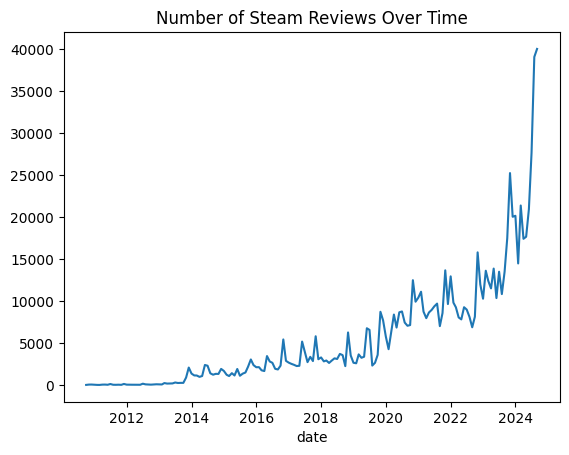

In [135]:
monthly_counts = steamdataset.groupby(steamdataset['date'].dt.to_period('M')).size()
monthly_counts.index = monthly_counts.index.to_timestamp()
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title('Number of Steam Reviews Over Time')

### Question: Does playing more of the game result in more helpful reviews for other users?

Having played more hours of each game does not indicate that the review is more helpful. A certain amount of hours on the lower end may be enough to provide significant enough information for a good review!

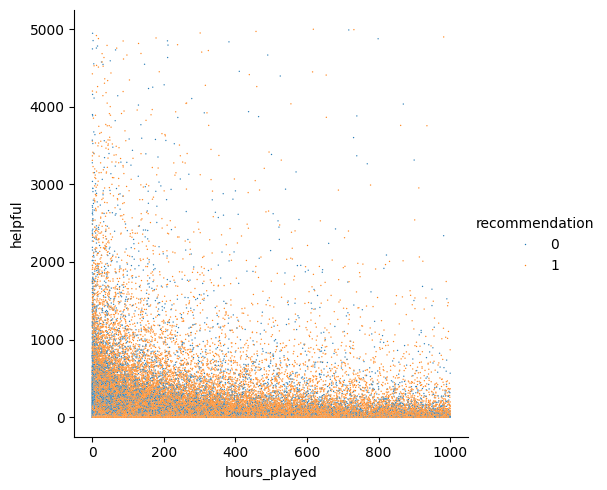

In [136]:
plot = sns.relplot(data=steamdataset[(steamdataset['hours_played'] <= 1000) & (steamdataset['helpful'] <= 5000)], x='hours_played', y='helpful', hue='recommendation', s=1)

### Do funny and helpful reviews correlate? Are they helpful/funny just based on general popularity?

This graph shows that there is not a very significant correlation between funny and helpful reviews. So even if a review may be popular, it doesn't mean that it will equally gain helpful or funny votes. It is more likely that they will be either a helpful review or a funny review.

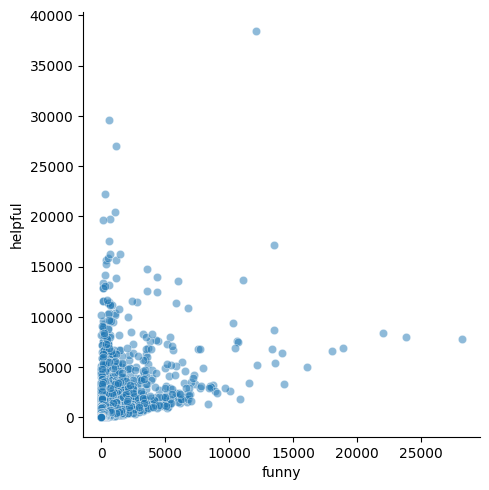

In [137]:
sns.relplot(data=steamdataset[steamdataset.funny <= 40000], x='funny', y='helpful', alpha=0.5)

### Question: How do sales affect game reviews? Do players like a game more if they are cheaper?

In [138]:
insaleds = steamdataset.groupby('in_sale').recommendation.mean()
insaleds

in_sale
0    0.804494
1    0.811659
Name: recommendation, dtype: float64

Here is a graph of the difference between in sale reviews (in the months of July and January) and not in_sale. We see a marginal difference with slightly better overall reviews for in sale reviews, but not a significant difference. The expectation was that because players purchased at a reduced cost they would recommend the game more, but apprently the difference in price was not that significant in overall perception.

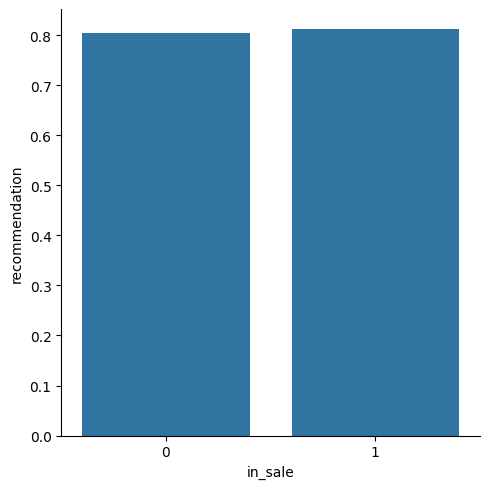

In [139]:
sns.catplot(data=insaleds, kind='bar', legend=False)

# Save To CSV

We can reuse the explored and updated data.

In [140]:
steamdataset.to_csv('../data/steamdataset.csv', index=False)